<a href="https://colab.research.google.com/github/lntelliMed/weed-detection-in-soybean-crops/blob/master/weed_detection_in_soybean_crops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import cv2
import glob
import os

import matplotlib.pyplot as plt 
%matplotlib inline

plt.rcParams['figure.figsize'] = (19.0, 17.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:


from google.colab import drive
drive.mount('/content/drive', force_remount=True)

for dirname in os.walk('/content/drive/My Drive/kaggle/soybean-crop-images'):
    print(dirname)

print(os.listdir('/content/drive/My Drive/kaggle/soybean-crop-images'))


Mounted at /content/drive
('/content/drive/My Drive/kaggle/soybean-crop-images', ['soybean', 'broadleaf', 'soil', 'grass'], [])
('/content/drive/My Drive/kaggle/soybean-crop-images/soybean', [], ['858.tif', '5172.tif', '694.tif', '5166.tif', '6309.tif', '7017.tif', '1466.tif', '5600.tif', '5833.tif', '6484.tif', '2184.tif', '119.tif', '4293.tif', '3271.tif', '6490.tif', '5199.tif', '4287.tif', '2190.tif', '131.tif', '125.tif', '2806.tif', '643.tif', '5827.tif', '1499.tif', '657.tif', '6645.tif', '2812.tif', '4052.tif', '1658.tif', '6137.tif', '4734.tif', '2423.tif', '2345.tif', '1894.tif', '6123.tif', '1880.tif', '7229.tif', '2351.tif', '3701.tif', '4046.tif', '4720.tif', '6889.tif', '3729.tif', '2437.tif', '5358.tif', '6651.tif', '5370.tif', '1670.tif', '2379.tif', '3067.tif', '7201.tif', '6679.tif', '4708.tif', '1116.tif', '482.tif', '3073.tif', '5416.tif', '1102.tif', '6686.tif', '5364.tif', '7215.tif', '1664.tif', '496.tif', '5402.tif', '3715.tif', '3926.tif', '4091.tif', '1857.tif

In [0]:
data_dir = r'/content/drive/My Drive/kaggle/soybean-crop-images/'
classes = ['broadleaf', 'grass', 'soil', 'soybean'] 

num_file = 1100 
all_files = [] 
num_data =num_file*len(classes)
Y = np.zeros(num_data)


for i, cls in enumerate(classes):
    all_files += [f for f in glob.glob(data_dir+cls+'/*.tif')][:num_file]
    Y[i*num_file:(i+1)*num_file] = i # label all classes with int [0.. len(classes)]

    
# Image dimension
im_width = 200
im_height = 200 
im_channel = 3
dim = im_width * im_height * im_channel

X = np.ndarray(shape=(num_data, im_width, im_height, im_channel), dtype=np.float64)

for idx, file in enumerate(all_files):
    X[idx] = cv2.resize(cv2.imread(file), (im_width, im_height))

X_train = np.empty(shape=(4000,im_width, im_height, im_channel), dtype=np.float64)
X_val = np.empty(shape=(200,im_width, im_height, im_channel), dtype=np.float64)
X_test = np.empty(shape=(200,im_width, im_height, im_channel), dtype=np.float64)

y_train = np.empty(4000)
y_val = np.empty(200)
y_test = np.empty(200) 

for i, cls in enumerate(classes): 
    X_test[50*i:50*(i+1)] = X[np.where(Y == i)[0][:50]]
    X_val[50*i:50*(i+1)] = X[np.where(Y == i)[0][50:100]]
    X_train[1000*i:1000*(i+1)] = X[np.where(Y == i)[0][100:]]
    
    y_test[50*i:50*(i+1)] = i
    y_val[50*i:50*(i+1)] = i
    y_train[1000*i:1000*(i+1)] = i
    
del Y 
del X

train_idxs = np.random.permutation(X_train.shape[0])
y_train  = y_train[train_idxs].astype(int)
X_train = X_train[train_idxs]

X_train = np.reshape(X_train, (X_train.shape[0], -1)).astype('float64')
X_test = np.reshape(X_test, (X_test.shape[0], -1)).astype('float64')
X_val = np.reshape(X_val, (X_val.shape[0], -1)).astype('float64')

X_tiny = X_train[100:110].astype('float64')
y_tiny = y_train[100:110].astype(int)
num_dev = 500

X_dev = X_train[0:num_dev].astype('float64')
y_dev = y_train[0:num_dev].astype(int)
print("X_train shape", X_train.shape, "| y_train shape:", y_train.shape)
print("X_test shape", X_test.shape, "| y_test shape:", y_test.shape)
print("X_val shape", X_val.shape, "| y_val shape:", y_val.shape)
print("X_dev shape", X_dev.shape, "| y_dev shape:", y_dev.shape)
print("X_tiny shape", X_tiny.shape, "| y_tiny shape:", y_tiny.shape)


mean_image = 128
X_train -= mean_image
X_val -= mean_image 
X_test -= mean_image
X_dev -= mean_image
X_tiny -= mean_image


print('=====STACK BIAS term=====')
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("X_val shape", X_val.shape)
print("X_dev shape", X_dev.shape)
print("X_tiny shape", X_tiny.shape)

X_train shape (4000, 120000) | y_train shape: (4000,)
X_test shape (200, 120000) | y_test shape: (200,)
X_val shape (200, 120000) | y_val shape: (200,)
X_dev shape (500, 120000) | y_dev shape: (500,)
X_tiny shape (10, 120000) | y_tiny shape: (10,)
=====STACK BIAS term=====
X_train shape (4000, 120000)
X_test shape (200, 120000)
X_val shape (200, 120000)
X_dev shape (500, 120000)
X_tiny shape (10, 120000)


In [1]:
classes = ['broadleaf', 'grass', 'soil', 'soybean']
n_class = len(classes)
samples_per_class = 5


for y, cls in enumerate(classes):
    idxes = np.flatnonzero(y == y_train)
    idxes = np.random.choice(idxes, samples_per_class, replace = False)
    for i, idx in enumerate(idxes):
        plt_idx = i * n_class + y + 1
        plt.subplot(samples_per_class,n_class, plt_idx)
        plt.imshow(X_train[idx].reshape(im_width, im_height, im_channel).astype('uint8'))
        if(i==0): plt.title(cls)

plt.show()

NameError: ignored

In [0]:
class TwoLayerNet():
    def __init__(self, input_size, hidden_size, output_size, std= 1e-4):
        self.params = {}
        self.params['W1'] = std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def loss(self, X, y = None, reg=0.0):
        relu = lambda x:np.maximum(0,x)

        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        N, D = X.shape

        layer1 = relu(X.dot(W1) + b1)
        scores = layer1.dot(W2) + b2

        if(y is None): 
            return scores

        scores -= scores.max()

        scores = np.exp(scores)
        scores_sumexp = np.sum(scores, axis=1)

        softmax = scores / scores_sumexp.reshape(N,1)
        loss =  (-1.0) * np.sum(np.log(softmax[range(N),y]))

        loss /= N 
        loss += reg * np.sum(W1 * W1) 
        loss += reg * np.sum(W2 * W2) 

        grads = {}

        correct_class_scores = scores[range(N), y]
        softmax[range(N), y] = (-1.0) * (scores_sumexp - correct_class_scores)/scores_sumexp
        softmax /= N

        grads['W2'] = layer1.T.dot(softmax)
        grads['b2'] = np.sum(softmax, axis=0)
        grads['W2'] += reg * 2 * W2

        hidden = softmax.dot(W2.T)

        hidden[layer1 == 0] = 0 

        grads['W1'] = X.T.dot(hidden) 
        grads['b1'] = np.sum(hidden, axis=0)
        grads['W1'] += reg * 2 * W1

        return loss, grads

    def train(self, X, y, X_val, y_val, 
              learning_rate =1e-3, learning_rate_decay=0.95, 
              reg=5e-6, num_iters=100, 
              batch_size=200, it_verbose = 1, verbose=False):
        N, D = X.shape
        N_val = X_val.shape[0]
        iteration_per_epoch = max(N/batch_size, 1)
        
        loss_hist = []
        train_acc_hist = []
        val_acc_hist = []
        
        for it in range(num_iters):
            sampling = np.random.choice(np.arange(N), batch_size, replace=False) 
            X_batch = X[sampling]
            y_batch = y[sampling]
            
            loss, grads = self.loss(X_batch, y=y_batch, reg=reg)
            loss_hist.append(loss) 
            
            self.params['W1'] += (-1.0) * learning_rate * grads['W1']
            self.params['b1'] += (-1.0) * learning_rate * grads['b1']
            self.params['W2'] += (-1.0) * learning_rate * grads['W2']
            self.params['b2'] += (-1.0) * learning_rate * grads['b2']
            
            if(verbose and it%it_verbose==0):
                print('iteration: %d / %d | Loss: %f' % (it, num_iters, loss)) 

            if (it % iteration_per_epoch == 0):
                train_acc = (self.predict(X_batch) == y_batch).mean()
                val_acc = (self.predict(X_val) == y_val).mean()
                train_acc_hist.append(train_acc)
                val_acc_hist.append(val_acc)

                learning_rate *= learning_rate_decay
        return {
            'loss_hist':loss_hist,
            'train_acc_hist':train_acc_hist,
            'val_acc_hist':val_acc_hist
        }

    def predict(self, X):
        y_pred = None
        relu = lambda x:np.maximum(0,x)

        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']

        layer1 = relu(X.dot(W1) + b1)
        scores = layer1.dot(W2) + b2
        y_pred = np.argmax(scores, axis=1)

        return y_pred

In [0]:
input_size = im_width * im_height * im_channel
hidden_size = 200
output_size = n_class 
std = 1e-3

net = TwoLayerNet(input_size, hidden_size,output_size,std )
stats = net.train(X_dev, y_dev, X_val, y_val, 
              learning_rate =1e-5, learning_rate_decay=0.95, 
              reg=0.0, num_iters=70, 
              batch_size=100, it_verbose = 10,verbose=True)

iteration: 0 / 70 | Loss: 1.458619
iteration: 0 / 70 | Loss: 1.458619
iteration: 10 / 70 | Loss: 1.369712
iteration: 10 / 70 | Loss: 1.369712
iteration: 20 / 70 | Loss: 1.303531
iteration: 20 / 70 | Loss: 1.303531
iteration: 30 / 70 | Loss: 1.259622
iteration: 30 / 70 | Loss: 1.259622
iteration: 40 / 70 | Loss: 1.207276
iteration: 40 / 70 | Loss: 1.207276
iteration: 50 / 70 | Loss: 1.206023
iteration: 50 / 70 | Loss: 1.206023
iteration: 60 / 70 | Loss: 1.175623
iteration: 60 / 70 | Loss: 1.175623


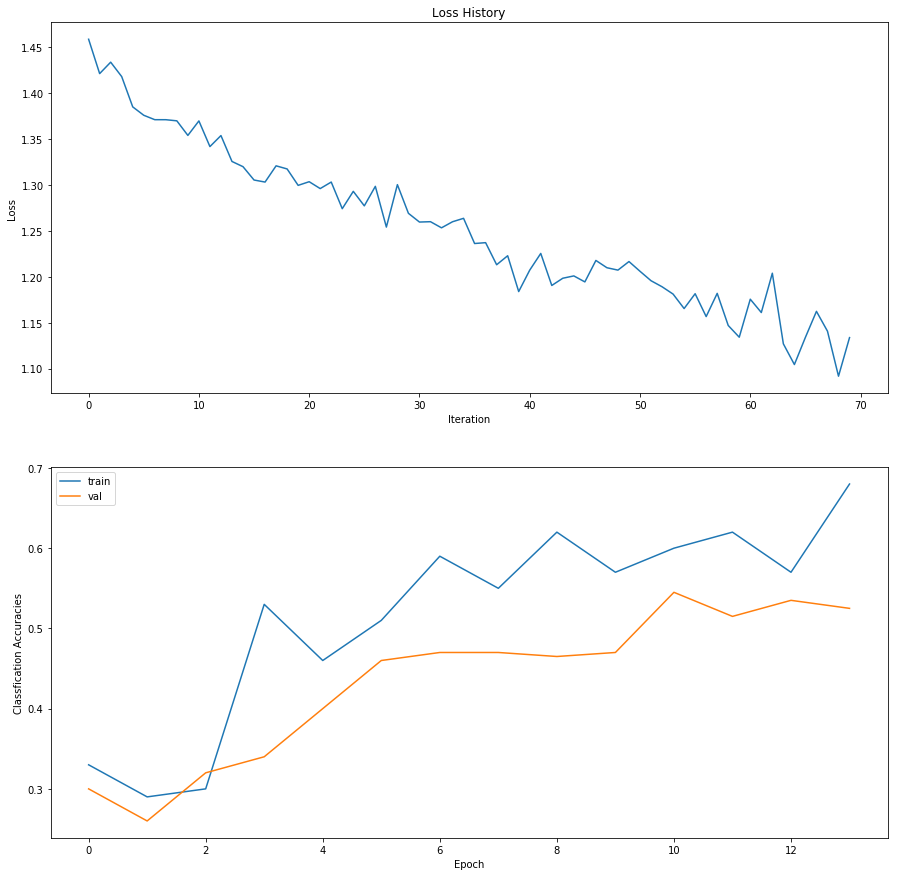

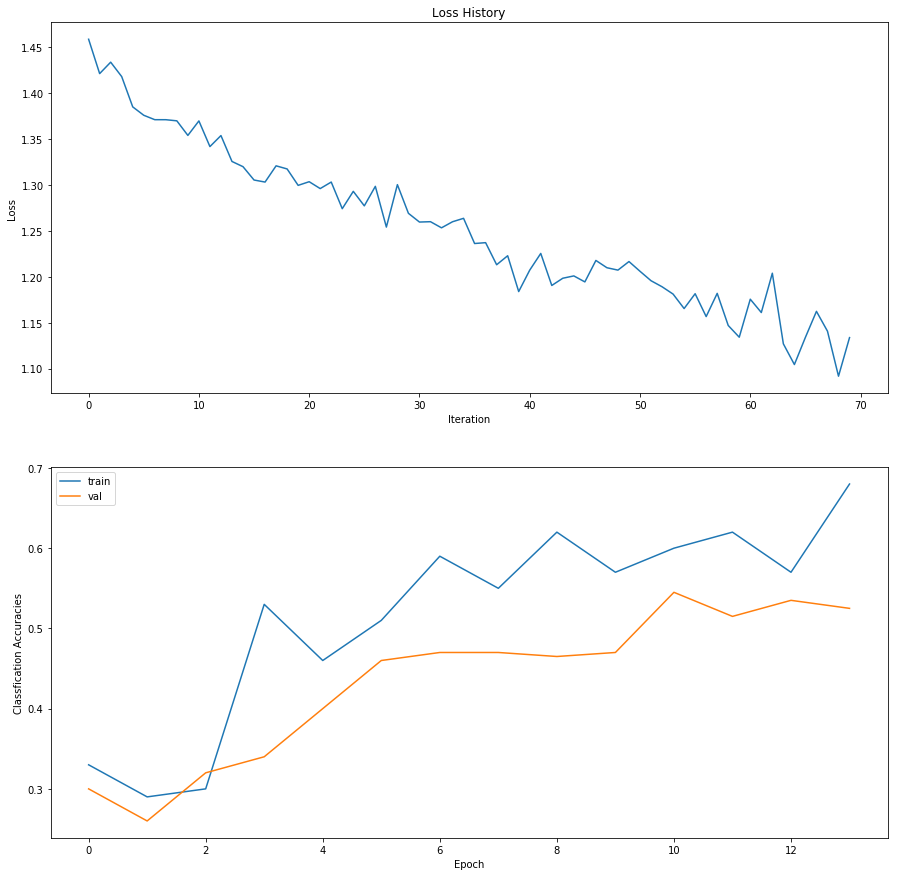

In [0]:
plt.rcParams['figure.figsize'] = (15.0, 15.0)
plt.subplot(2,1,1) 
plt.plot(stats['loss_hist'])
plt.title('Loss History')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2,1,2)
plt.plot(stats['train_acc_hist'], label='train')
plt.plot(stats['val_acc_hist'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Classfication Accuracies')
plt.legend()
plt.show()

In [0]:
print((net.predict(X_test) == y_test).mean())

0.52
0.52


In [0]:
best_net = None
best_val= -1


hidden_unit = [200]
learn_rates = [7.6e-5]
regularizations = [0.0]
iterations = [600]

result = {}
best_stats = None

input_size = im_height * im_width * im_channel
output_size = 4
for hidden in hidden_unit: 
    for learn in learn_rates:
        for r in regularizations:
            for iter in iterations:
                tune_net = TwoLayerNet(input_size,
                                       hidden_size=hidden,
                                       output_size=output_size,std=1e-3)
                stats = tune_net.train(X_train, y_train, X_val, y_val, 
                              num_iters=iter, batch_size=200, 
                              learning_rate=learn,learning_rate_decay=0.94, 
                              reg=r,  it_verbose = 100,verbose=True)
                train_acc = stats['train_acc_hist'][-1]
                val_acc = stats['val_acc_hist'][-1]
                result[(hidden, learn)] = (train_acc, val_acc)
                #print log
                print('hs:',hidden,'learn:',learn,'reg',r,'iter',iter,'train-acc:',train_acc,'val_acc',val_acc)
                if(val_acc > best_val):
                    best_val = val_acc
                    #create best net
                    best_stats = stats
                    best_net = tune_net
                del tune_net
                del stats

print("Accuracy on Test set", (best_net.predict(X_test) == y_test).mean())   

iteration: 0 / 600 | Loss: 1.392845
iteration: 0 / 600 | Loss: 1.392845
iteration: 100 / 600 | Loss: 0.664066
iteration: 100 / 600 | Loss: 0.664066
iteration: 200 / 600 | Loss: 0.499594
iteration: 200 / 600 | Loss: 0.499594
iteration: 300 / 600 | Loss: 0.517130
iteration: 300 / 600 | Loss: 0.517130
iteration: 400 / 600 | Loss: 0.508633
iteration: 400 / 600 | Loss: 0.508633
iteration: 500 / 600 | Loss: 0.428586
iteration: 500 / 600 | Loss: 0.428586
hs: 200 learn: 7.6e-05 reg 0.0 iter 600 train-acc: 0.82 val_acc 0.755
hs: 200 learn: 7.6e-05 reg 0.0 iter 600 train-acc: 0.82 val_acc 0.755
Accuracy on Test set 0.705
Accuracy on Test set 0.705


In [0]:
# References: https://www.kaggle.com/datduyn/2-layer-net-on-weeds-discriminant/